# 1.ANN

Tensorflow 2.0.0 ko documentation ramro sanga deko xaina so
 * [module,class,function,other_mamber](https://www.tensorflow.org/api_docs/python/tf?version=nightly)
 * [all symbols in tensorflow ](https://www.tensorflow.org/api_docs/python/)

In [5]:
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 72kB/s 
     |████████████████████████████████| 450kB 41.8MB/s 
     |████████████████████████████████| 3.8MB 47.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import tensorflow as tf 
print(tf.__version__)
import matplotlib.pyplot as plt

2.0.0


# A.Load and analyze the data. 

In [0]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train[0,:,:]) # print first sample train data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
print(y_train[0])# fist sample label  ...first sample ko label 9 x.
print(y_train.shape) # jati x_training x tyati nai y_training chinxa.

9
(60000,)


In [88]:
values,idx=tf.unique(y_train) # total no of class (labels)
print(values)
print(len(values))

tf.Tensor([9 0 3 2 7 5 1 6 4 8], shape=(10,), dtype=uint8)
10


In [89]:
print(x_test.shape) # 10000 ota x_test ko lagi pathako x


(10000, 784)


In [105]:
print(y_test)
print(y_test.shape) # jati ota x_test  tyati ota nai  y_test hunuparyo ni ta

[9 2 1 ... 8 1 5]
(10000,)


# B.split training dataset into data for trainning and validation 
*(validation ma split garnu nessecary haina tara confusion matrix analysis garna lai )

*sklearn ma :: train_test_split api  use garnixa dataset lai split garna.

In [0]:
from sklearn import model_selection as  ms


In [0]:
x_trai,x_val,y_trai,y_val=ms.train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [19]:
print(x_trai.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [20]:
print(y_trai.shape)

(48000,)


In [0]:
item_list=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Ankle boot']

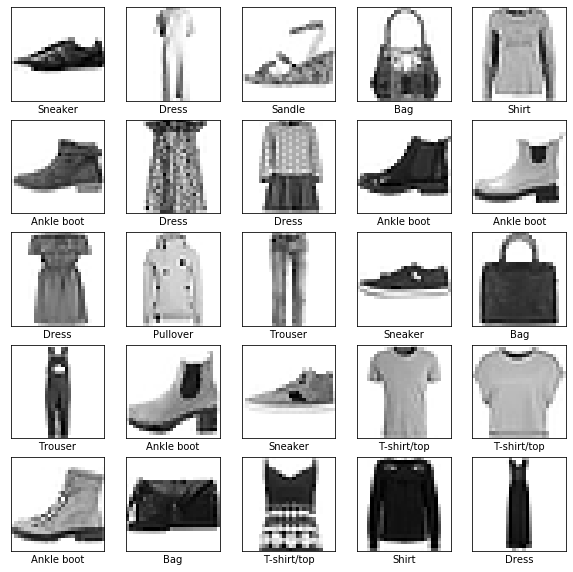

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):  # 25 ota kura plt garna lai
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_trai[i],cmap=plt.cm.binary) # train image show garna lai 
  plt.xlabel(item_list[y_trai[i]]) # train image ko corrosponding label print garna lai
plt.show() # plt    sanga assign vayako sabai kura sangai plot garna lai.

# Create neural network

In [0]:
input_size=28*28 #784  # input image jati size ko x tyati size ko nai input flatten banauni.
output_size=10   # label jati ota x tyati ota output size banauni.
hidden_1_shape=128 # no of neuron
hidden_2_shape=64 # second hidden layer no of neuron is 64
hidden_3_shape=32 # third hidden layer no of neuron is 32

In [0]:
# 
weights={
    'hidden_1': tf.Variable(tf.random.truncated_normal([input_size,hidden_1_shape]),trainable=True),
    'hidden_2': tf.Variable(tf.random.truncated_normal([hidden_1_shape,hidden_2_shape]),trainable=True),
    'hidden_3': tf.Variable(tf.random.truncated_normal([hidden_2_shape,hidden_3_shape]),trainable=True),
    'output':tf.Variable(tf.random.truncated_normal([hidden_3_shape,output_size]),trainable=True),
    'hidden_1_bias': tf.Variable(tf.random.truncated_normal([hidden_1_shape]),trainable=True),
    'hidden_2_bias': tf.Variable(tf.random.truncated_normal([hidden_2_shape]),trainable=True),
    'hidden_3_bias': tf.Variable(tf.random.truncated_normal([hidden_3_shape]),trainable=True),
    'output_bias':tf.Variable(tf.random.truncated_normal([output_size]),trainable=True)
    }

# reshape 
 reshape (sequence,(row kati ota banauni tyo,column kati ota banauni tyo))

 * note : row =-1 vaya no of sample sabai lai column=... column ... ma convert gardenxa. 

*  row=-1 means sabai row.
* column=-1 means sabai column


In [25]:
# reshape (sequence,(row kati ota banauni tyo,column kati ota banauni tyo))
x_trai=tf.reshape(x_trai,(-1,784)) #(48000=-1(sabai sample haru),784)
x_val=tf.reshape(x_val,(-1,784))
x_test=tf.reshape(x_test,(-1,784))
print(x_trai)

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(48000, 784), dtype=uint8)


# create batche
* from_tensor_slice((x,y).batch(batch_size) 

In [0]:
def create_batch(x,y,batch_size):
  x=tf.cast(x,tf.float32)
  data=tf.data.Dataset.from_tensor_slices((x,y)).batch(batch_size)
  return data

# Train epoch by epoch
**1.activation function::** depend which activation function is use.

* NOTE:: tensorflow ma herni kun activation function use garni ho vanyara
* Note::tf.nn... package ma xan activation function.
eg::tf.nn.relu,tf.nn.

**2.optimizer::**kun optimizer use garni tyo ni tha pauni.
* NOTE::tensorflow ma herni kun optimizer  use garna milxa vanyara.
eg::tf.optimizer.name_of_optimizer



In [0]:
def train_epoch_by_epoch(data):
  for i in data:
    with tf.GradientTape() as tape:
      fc_1=tf.sigmoid(tf.add(tf.matmul(i[0],weights['hidden_1']),weights['hidden_1_bias']))
      fc_2=tf.sigmoid(tf.add(tf.matmul(fc_1,weights['hidden_2']),weights['hidden_2_bias']))
      fc_3=tf.sigmoid(tf.add(tf.matmul(fc_2,weights['hidden_3']),weights['hidden_3_bias']))
      output_layer=tf.add(tf.matmul(fc_3,weights['output']),weights['output_bias'])
      label=tf.one_hot(i[1],10)
      cost=loss(label,output_layer)
    grads=tape.gradient(cost,trainable_weights)
    optimizer.apply_gradients(zip(grads,trainable_weights))
  return True


# forward propagation to evaluate training and validation accuracy

*NOTE: last predicted layer argmax use garni compulsory

In [0]:
def eval_epoch_by_epoch(data):
  tot_cost=0
  accuracy=0
  iter=0
  for i in data:
    size=(i[0].shape)[0]
    fc_1=tf.sigmoid(tf.add(tf.matmul(i[0],weights['hidden_1']),weights['hidden_1_bias']))
    fc_2=tf.sigmoid(tf.add(tf.matmul(fc_1,weights['hidden_2']),weights['hidden_2_bias']))
    fc_3=tf.sigmoid(tf.add(tf.matmul(fc_2,weights['hidden_3']),weights['hidden_3_bias']))
    output_layer=tf.add(tf.matmul(fc_3,weights['output']),weights['output_bias'])
    label=tf.one_hot(i[1],10)
    cost=loss(label,output_layer)
    tot_cost+=cost
    predicted=tf.argmax(output_layer,axis=1)
    label=tf.cast(i[1],tf.int64)
    res=tf.equal(predicted,label)
    mean_correct=tf.reduce_sum(tf.cast(res,tf.float32))/size
    accuracy+=mean_correct
    iter+=1
  return (tot_cost,accuracy/iter) 

# main benifit of tensorflow 
* **loss::** loss calculate gardenxa
* **optimizer::** optimizer grade calculate gardenxa
 




In [29]:
learning_rate =0.001
epoch=200
batch_size=128
loss=tf.losses.CategoricalCrossentropy(from_logits=True)
optimizer=tf.optimizers.Adam(learning_rate)
trainable_weights=[]
for i in weights:
  trainable_weights.append(weights[i])
for i in range(epoch):
  train_data=create_batch(x_trai,y_trai,batch_size)
  train_data=iter(train_data)
  train_data=[next(train_data)]
  train_epoch_by_epoch(train_data)
  train_cost,train_acc=eval_epoch_by_epoch(train_data)
  if(i%10==0):
    print(f"Epoch :({i}/{epoch}) Train_cost:{train_cost:.5f} train_accuracy:{train_acc:.3f}")


Epoch :(0/200) Train_cost:4.25798 train_accuracy:0.141
Epoch :(10/200) Train_cost:3.54978 train_accuracy:0.227
Epoch :(20/200) Train_cost:3.10991 train_accuracy:0.258
Epoch :(30/200) Train_cost:2.74316 train_accuracy:0.297
Epoch :(40/200) Train_cost:2.42913 train_accuracy:0.305
Epoch :(50/200) Train_cost:2.19079 train_accuracy:0.336
Epoch :(60/200) Train_cost:1.98128 train_accuracy:0.375
Epoch :(70/200) Train_cost:1.79116 train_accuracy:0.430
Epoch :(80/200) Train_cost:1.62620 train_accuracy:0.539
Epoch :(90/200) Train_cost:1.48798 train_accuracy:0.602
Epoch :(100/200) Train_cost:1.36653 train_accuracy:0.633
Epoch :(110/200) Train_cost:1.26006 train_accuracy:0.656
Epoch :(120/200) Train_cost:1.16421 train_accuracy:0.688
Epoch :(130/200) Train_cost:1.07756 train_accuracy:0.742
Epoch :(140/200) Train_cost:0.99790 train_accuracy:0.766
Epoch :(150/200) Train_cost:0.92411 train_accuracy:0.789
Epoch :(160/200) Train_cost:0.85566 train_accuracy:0.820
Epoch :(170/200) Train_cost:0.79204 train_

# Using Keras 

In [30]:
print(x_trai.shape)

(48000, 784)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Softmax

In [0]:
input_size=784
output_size=10
hidden_1_shape=128
hidden_2_shape=64
hidden_3_shape=32

In [0]:
model=Sequential([Dense(hidden_1_shape,input_shape=(input_size,),activation='sigmoid'),
                  Dense(hidden_2_shape,activation='sigmoid'),
                  Dense(hidden_3_shape,activation='sigmoid'),
                  Dense(output_size),
                  Softmax()
                  ])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(x_trai,y_trai,batch_size=128,validation_data=(x_val,y_val),epochs=50)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 72us/sample - loss: 1.4030 - accuracy: 0.5563 - val_loss: 0.9766 - val_accuracy: 0.6538
Epoch 2/50
48000/48000 [==============================] - 3s 67us/sample - loss: 0.8620 - accuracy: 0.6919 - val_loss: 0.7941 - val_accuracy: 0.6907
Epoch 3/50
48000/48000 [==============================] - 3s 64us/sample - loss: 0.7516 - accuracy: 0.7129 - val_loss: 0.7311 - val_accuracy: 0.7309
Epoch 4/50
48000/48000 [==============================] - 3s 65us/sample - loss: 0.7327 - accuracy: 0.7204 - val_loss: 0.7022 - val_accuracy: 0.7089
Epoch 5/50
48000/48000 [==============================] - 3s 64us/sample - loss: 0.7160 - accuracy: 0.7276 - val_loss: 0.7445 - val_accuracy: 0.6942
Epoch 6/50
48000/48000 [==============================] - 3s 63us/sample - loss: 0.7057 - accuracy: 0.7213 - val_loss: 0.7111 - val_accuracy: 0.7175
Epoch 7/50
48000/48000 [==============================] 

In [90]:
loss,accuracy=model.evaluate(x=x_test,y=y_test,batch_size=128,verbose=2)

10000/1 - 0s - loss: 0.4734 - accuracy: 0.7947


In [91]:
accuracy

0.7947

In [92]:
prediction=model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(y_test)

print(prediction)

(10000, 784)
(10000,)
[9 2 1 ... 8 1 5]
[[3.1989015e-04 2.9349323e-05 2.8271546e-05 ... 6.4133041e-02
  8.6650774e-03 2.0004131e-01]
 [3.4950975e-02 3.3224807e-03 7.8575909e-01 ... 1.6222391e-08
  1.1489131e-02 6.5444394e-05]
 [2.6805286e-04 9.9878174e-01 3.8788603e-05 ... 2.8978434e-07
  7.3357160e-07 9.5511632e-06]
 ...
 [2.3767869e-01 3.0603947e-04 9.1873864e-03 ... 2.2475355e-05
  6.9326097e-01 1.1996697e-04]
 [3.1790291e-03 9.5663011e-01 1.7703920e-04 ... 1.0564272e-05
  3.4926008e-05 8.5780790e-05]
 [1.9238953e-04 3.4837223e-05 4.1923026e-06 ... 1.6696258e-01
  1.7976100e-02 1.1222121e-02]]


In [114]:
prediction.shape

(10000, 10)

In [0]:
predicted=tf.argmax(prediction,axis=1)

In [101]:
predicted.shape

TensorShape([10000])

In [118]:
data={'actual_label':y_test,'predicted label':predicted}
print(data)

{'actual_label': array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), 'predicted label': <tf.Tensor: id=312851, shape=(10000,), dtype=int64, numpy=array([5, 2, 1, ..., 8, 1, 5])>}


In [0]:
import pandas as pd 
